<h1 align = center><font size = 5>Image Procesing With Python(Matplotlib,Numpy and OpenCV)<font/></h1>

<h1>Introduction!</h1>
<h3>Welcome</h3>
<p>int this section, you will learn how to obtain the histogram from image, do normalization to image intesities, calculate cumulative histogram. By the end of this lab you will successfully learn histogram equalization</p>

### Prerequisite:
* [Python Tutorial](https://docs.python.org/3/tutorial/)
* [Numpy Tutorial](https://numpy.org/doc/stable/user/absolute_beginners.html)
* [Matplotlib Image Tutorial](https://matplotlib.org/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#histogram_">Histogram Calculation</a>
    <li><a href="#intensity_norm">Intensity Normalization</a></li>
    <li><a href="#cummulative_histogram">Cummulative Histogram</a></li>
    <li><a href="Histogram_eq">Histogram Equalization</a></li>
</ol>
</div>


<h2>what is the purpose of the histogram?</h2>
<P>describe the frequency of intensity values, brightness variation and show you how individual brightness levels are occupid in image, if the image was darker overall histogram would be concentrated towards black. and if the image was brighter, but with lower contrast. then the histogram would be thinner and concentrated near the whiter brightness levels. </p>
<p>histogram dipct the problem that originate during image acquistion, and reveal if there is much noise in the image, if the ideal histogram is known. we might want to remove this noisy </p>

### Import Packages.

In [119]:

import os                           # Miscellaneous operating system interface.
import numpy as np                  # linear algebra and scientific computing library.
import matplotlib.pyplot as plt     # visualization package.
import matplotlib.image as mpimg    # image reading and displaying package.
import cv2                          # computer vision library.

%matplotlib inline                 

### list of images:
listing the images in the directory.

In [120]:
# images path
path = '..\..\images'

# list of images names
list_imgs = os.listdir(os.path.join(path,'img_proc'))

print(list_imgs)

['aaaa.jpg', 'airfield-05small-auto.tif', 'airplan_noisy.jpg', 'bird.png', 'brain_scan_noisy.jpeg', 'camera_man.png', 'camera_man2.jpg', 'camera_man_noisy.jpg', 'cat.jpg', 'cat_eye.jpg', 'child.jpg', 'city.jpg', 'city_noisy.jpg', 'city_view.jpg', 'crew-small.tif', 'dog.jpg', 'farm.jpg', 'farm_2.jpg', 'giraffe.jpg', 'giraffe_2.jpg', 'girl_binary.jpg', 'girl_eye_noisy.jpg', 'girl_noisy.jpg', 'glass_buliding.jpg', 'home_noisy.jpg', 'horse.jpg', 'house.jpg', 'human_brain.jpg', 'human_eye.jpg', 'licence_plate.jpg', 'man.jpg', 'man_noisy.jpg', 'man_standing.jpg', 'man_walking.jpg', 'man_walking2.jpg', 'moon.jpg', 'sclupture.jpg', 'shape_1.png', 'skull_binary.png', 'statue.jpg', 'stones_1.jpg', 'stones_2.jpg', 'stones_3.jpg', 'stones_4.jpg', 'stones_5.jpg', 'stones_6.jpg', 'stones_7.jpg', 'street_name.jpg', 'teeth_human.jpg', 'tractor.jpg', 'warrning_sign.png', 'woman_setting_down.gif', 'words_shape.jpg']


### Reading Image:
* each image has a width and height (2-dim matrix).
* each coordinate is $I(u,v)$ we calling intenisty where `u` is row index and `v` is column index.

In [121]:
# display sample.
path = os.path.join(path,'img_proc',list_imgs[10])
image = mpimg.imread(path)

# printing image dimensions.
print(image.shape)

(2003, 3000, 3)


by taking a look to the result above we have image `2003` as width (rows) and `3000` as height (columns). in addition to the third element represent the colors channels `3`

### Convert Image to grayscale:

In [122]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# printing grayscale image dimension.
print(gray_img.shape)

(2003, 3000)


above, we can see the result of printing image shape is little bit different. there are just two elements the width and height.
<br>
in grayscale image we just got 1 color channel.

#### elements of image datatype.

In [123]:
# depth of image is 8-bit grayscale
print(image.dtype)

uint8


#### Displaying the image.

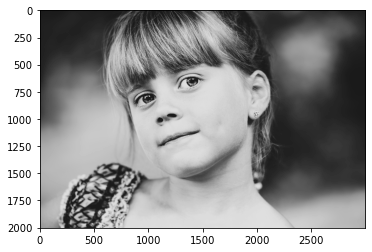

In [124]:
# display sample.
plt.imshow(gray_img,cmap='gray')
plt.show()

## 1-Histogram Calculation:
### Grayscale image Histogram:
each single histogram is defined as where&nbsp;  $h(i) = card\{(u,v)|I(u,v) = i\}$&nbsp; &nbsp;$\forall$ $i \in [0,k-1]$
* $h(i)$ is the number of pixels in I with intensity value i 
* $K = 2^8 = 256 - 1 = 255$
* 	$h(0),h(1),h(2),\dots,h(255)$

### Histogram Calcualtion Methods:
* Numpy Methods
* OpenCV Method.
* Matplotlib Method for calculating and visualizing in one step.

#### Numpy Methods.

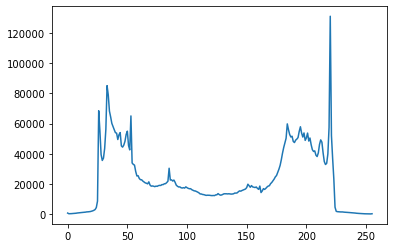

In [125]:
# numpy method-1
un_val,occ_counts = np.unique(gray_img,return_counts = True)
plt.plot(un_val,occ_counts)
plt.show()

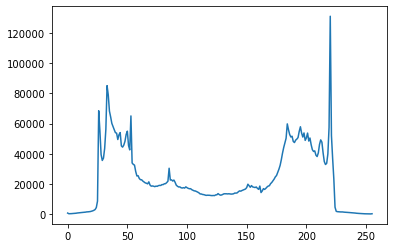

In [126]:
# histogram calculation with 'numpy.histogram()' function (method-2).
hist_np,_= np.histogram(gray_img.flatten(),256,[0,256])
plt.plot(hist_np)
plt.show()

#### OpenCV Method.

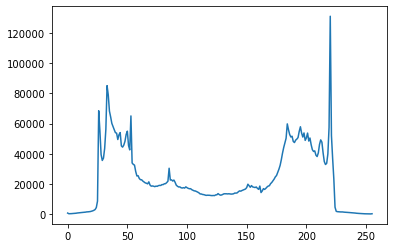

In [127]:
# histogram calculation opencv function with bins (method-4).
hist_cv = cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.plot(hist_cv)
plt.show()

#### Matplotlib Method.

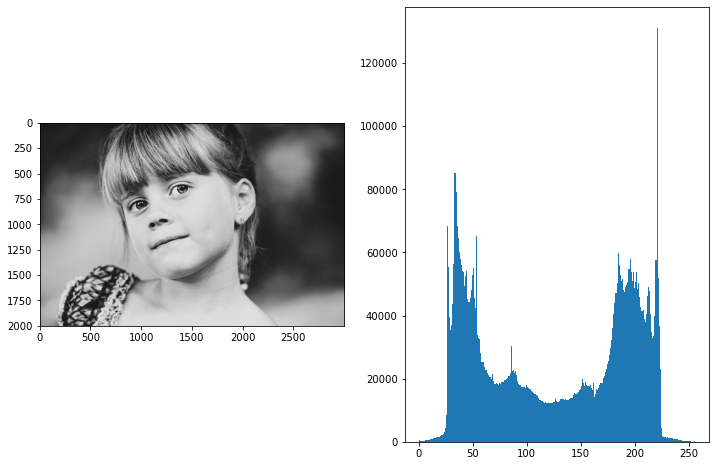

In [128]:
# display the histogram (Matplotlib) method-3
fig,axes = plt.subplots(1,2,figsize=(12,8))

# display grayscale image and it's histogram.
axes[0].imshow(gray_img,cmap='gray')
axes[1].hist(gray_img.flatten(),256,[0,256])

# show the figure.
plt.show()

### 2-Intensity Normalization:
stretching the range of image intensities, simply instead of dealing with values ranging $[0-255]$&nbsp;. the values will be ranging $[0,1]$.
<br>
here it's the equation: $N_{x,y} = \frac{O_{x,y}}{O_{max}}$
* $N_{x,y}$&nbsp;$\rightarrow$&nbsp; new image (output).
* $O_{x,y}$&nbsp;$\rightarrow$&nbsp; old image(input).
* $(x,y)\rightarrow$&nbsp;is the Intensity or pixel coordinates
* $O_{max}$&nbsp;$\rightarrow$&nbsp; maximum value of intensities in the input image.

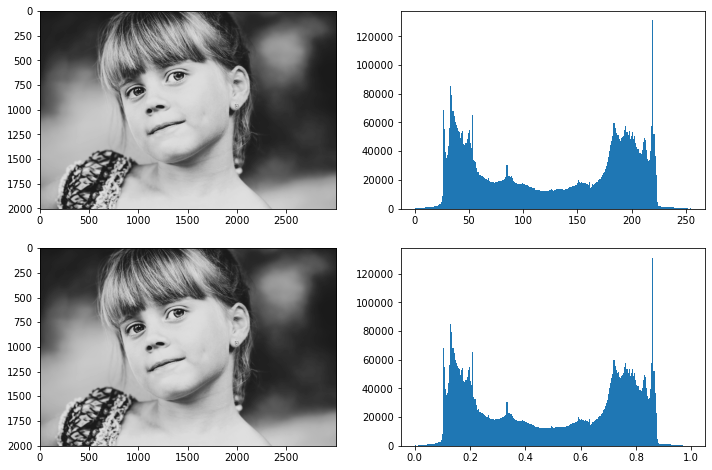

In [129]:
# image normalization
normalized_image = gray_img / float(gray_img.max())

# plotting figure.
fig, axes = plt.subplots(2,2,figsize=(12,8))

# display grayscale image and it's histogram.
axes[0][0].imshow(gray_img,cmap = 'gray')
axes[0][1].hist(gray_img.flatten(),256)

# display normalized grayscale image and it's histogram.
axes[1][0].imshow(normalized_image,cmap = 'gray')
axes[1][1].hist(normalized_image.flatten(),256)
# show the figure.
plt.show()

### 3-Cummulative Histogram:
derived from the ordinary histogram, and is useful when you performing certain image operations involving histogram e.g(Histogram Equlization). in other words we using to computer parameters for several common point operations.
<br>
<br>
here it's the mathemtical formula: &nbsp;$H(i) = \sum_{j=0}^i h(j)$ &nbsp; for &nbsp; $0 \leq i \lt k$, where&nbsp; $k = 2^8$
* H(i) the sum of all histogram values h(j) where $j \leq i$
* $H(k-1) = \sum_{j=0}^{k-1} h(j) = M \times N$ <br> where the total number of pixels in image is Width M and Height N

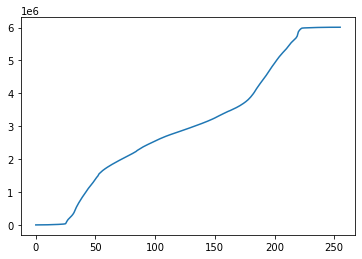

In [130]:
# method-1
_,hist = np.unique(gray_img,return_counts=True)
cum_hist = np.cumsum(hist)

plt.plot(cum_hist)
plt.show()

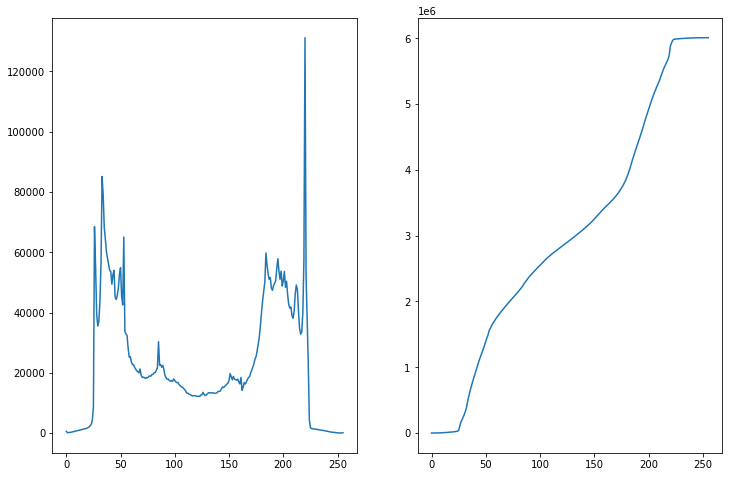

In [131]:
# cumulative histogram calculation.
hist_0,bins = np.histogram(gray_img.flatten(),256,[0,256])
cum_hist = hist_0.cumsum()
fig,axes = plt.subplots(1,2,figsize=(12,8))
axes[0].plot(hist_0)
axes[1].plot(cum_hist)
plt.show()

### 4-HIstogram Equalization:
<p>
nonlinear process aimed to highlight image brightness in away particularly suited to human visual analysis, and the produced picture with flatter histogram where all the levels equiprobable.
</p>

Here it's the first equation: $f_{eq}(a) =  \lfloor {H}(a)\cdot \frac{K-1}{M \cdot N}\rfloor$
<br>
$E(q,O) = \frac{N_{max} - N_{min}}{N^2}\times\displaystyle\sum_{l=0}^ p O(l)$ 
<br>
$N_{x,y} = E(O_{x,y},O)$
* $E(q,O)$&nbsp;$\rightarrow$&nbsp; function take cummlative histogram and the image as input.
* $(N_{max} - N_{min})$&nbsp;$\rightarrow$&nbsp;$(K-1) = (2^8 - 1) = (256 -1) = 255$,&nbsp; $k = 255$ where $N_{max}$ is 255 and $N_{min} = 0$
* $l$&nbsp;$\rightarrow$ each level value.
* $p \rightarrow$&nbsp;is levels of the histogram.
* $\sum_{l = 0}^p O(l) \rightarrow$&nbsp;cumulative histogram
* $N^2 \rightarrow$&nbsp; image width and height&nbsp; $(M \times N)$

#### Numpy method.

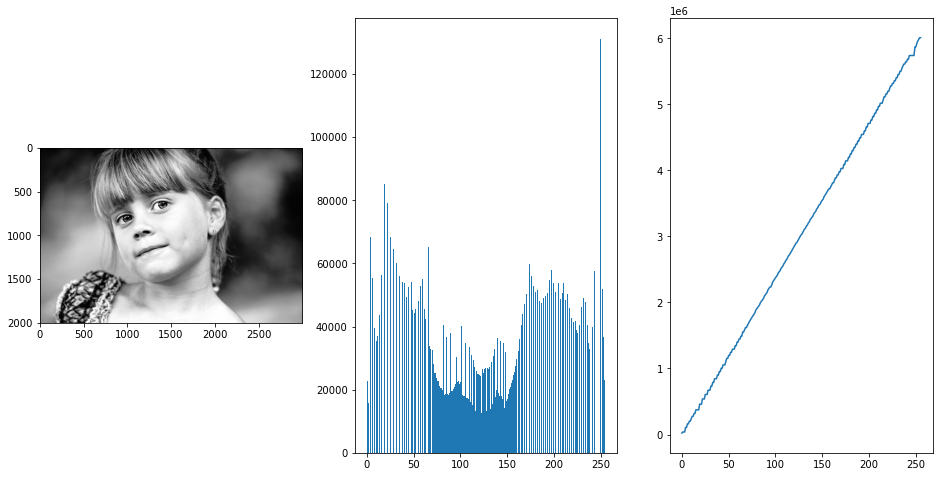

In [132]:
# histogram equalization calculation.
hist_eq = cum_hist * (255/(gray_img.shape[0] * gray_img.shape[1]))
eq_image = hist_eq[gray_img]
# cumulative histogram calculation.
hist_0,bins = np.histogram(eq_image.flatten(),256,[0,256])
cum_hist = hist_0.cumsum()

fig, axes = plt.subplots(1,3,figsize=(16,8))
axes[0].imshow(eq_image,cmap='gray')
axes[1].hist(eq_image.flatten(),256)
axes[2].plot(cum_hist)
plt.show()

#### OpenCV Method.

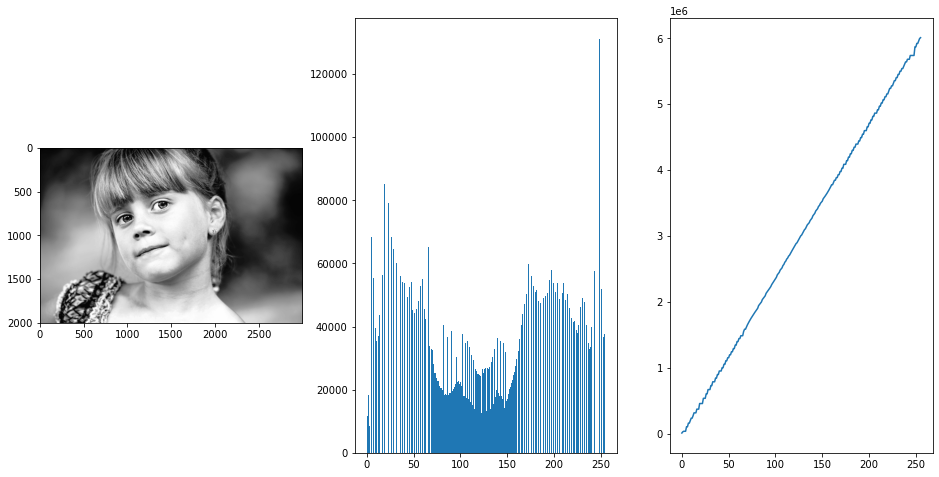

In [134]:
# display the equalized histogram
eq_img_cv = cv2.equalizeHist(gray_img)
# cumulative histogram calculation.
hist_0,bins = np.histogram(eq_img_cv.flatten(),256,[0,256])
cum_hist = hist_0.cumsum()
fig,axes = plt.subplots(1,3,figsize=(16,8))
axes[0].imshow(eq_img_cv,cmap='gray')
axes[1].hist(eq_img_cv.flatten(),256)
axes[2].plot(cum_hist)
plt.show()

### About The Author:
this notebook written by Mohamed Salah Hassan Akel, Machine learning Engineer.

<hr>
<p>Copyright &copy; 2020 Mohamed Akel Youtube Channel. This notebook and its source code are released under the terms of the <a href="">MIT License</a>.</p>